In [1]:
import pandas as pd

In [2]:
col_names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
housing=pd.read_csv('housing.csv',names=col_names,header=None)

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.shape

(506, 14)

In [5]:
#Checking null values in dataset
housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<AxesSubplot:>

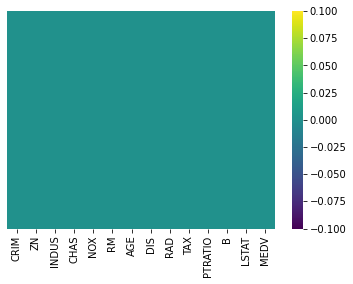

In [6]:
import seaborn as sns
sns.heatmap(data=housing.isnull(),yticklabels=False,cmap='viridis')

#### Basically we all have numerical values in which we have discrete and continuous variable.

In [7]:
#Discrete features
discrete_feature=[feature for feature in housing if len(housing[feature].unique())<25]
print(f"Discrete feature count {len(discrete_feature)}")

Discrete feature count 2


In [8]:
housing[discrete_feature].head()

,CHAS,RAD
0,0,1
1,0,2
2,0,2
3,0,3
4,0,3


#### Finding the realtionship between sales and discrete variable

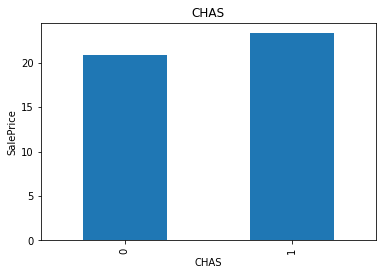

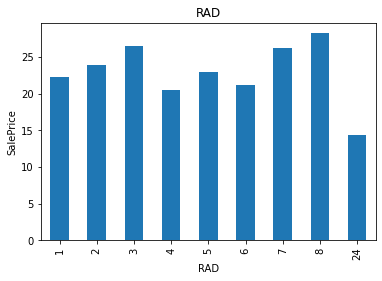

In [9]:
import matplotlib.pyplot as plt
for feature in discrete_feature:
    data=housing.copy()
    data.groupby(feature)['MEDV'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [10]:
#Continuous features
continuous_feature=[feature for feature in housing if feature not in discrete_feature]
print(f"Continuous variable count {len(continuous_feature)}")

Continuous variable count 12


In [11]:
housing[continuous_feature].head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222,18.7,396.90,5.33,36.2


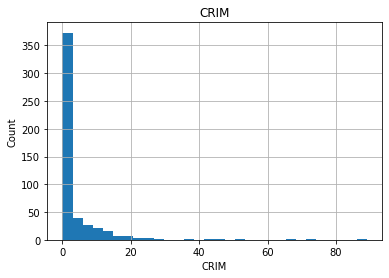

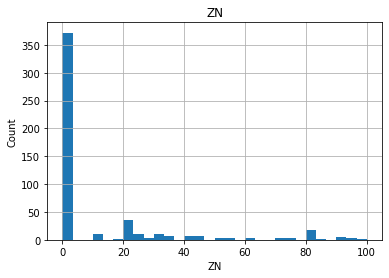

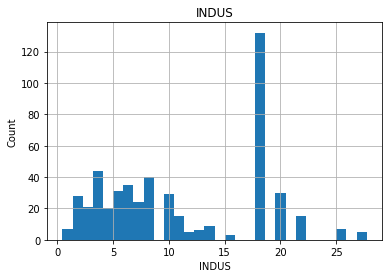

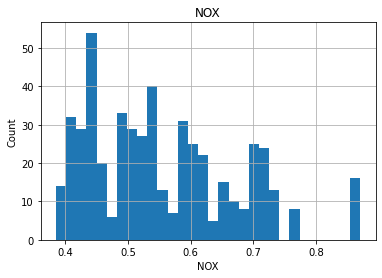

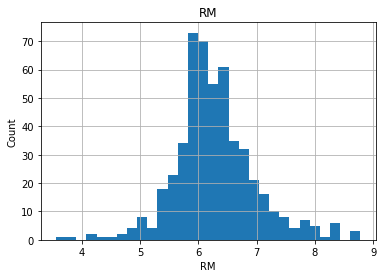

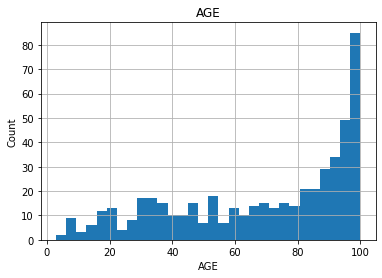

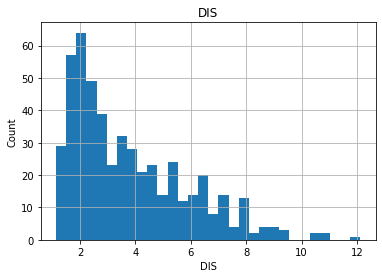

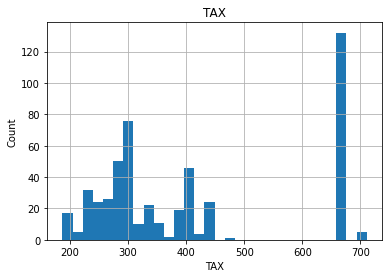

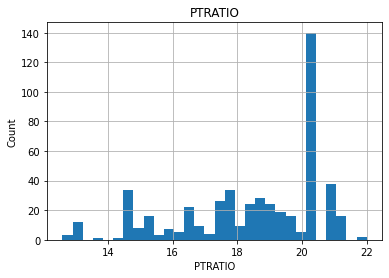

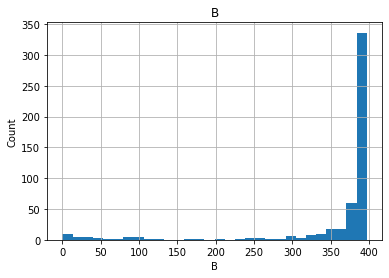

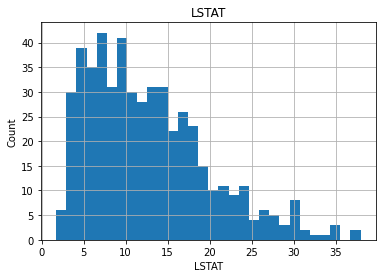

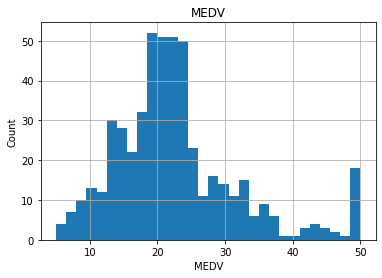

In [12]:
for feature in continuous_feature:
    data=housing.copy()
    data[feature].hist(bins=30)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [13]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Correlation

In [14]:
corr=housing.corr()

In [15]:
corr['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

<AxesSubplot:>

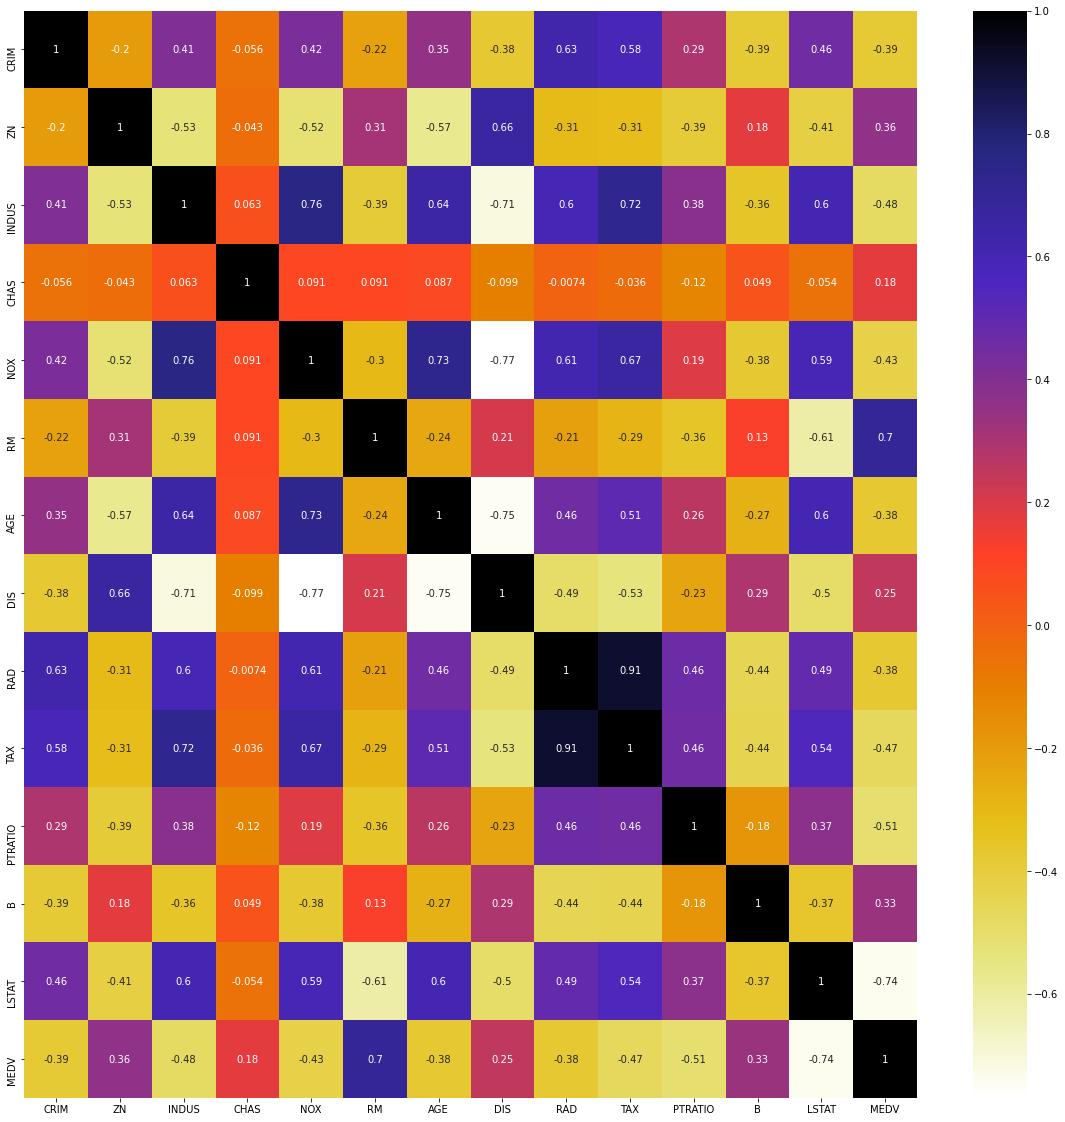

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(housing.corr(),annot=True,cmap=plt.cm.CMRmap_r)

In [17]:
## As we can see that TAX and RAD are highly correlated which is 91% so we can remove any one of them 

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

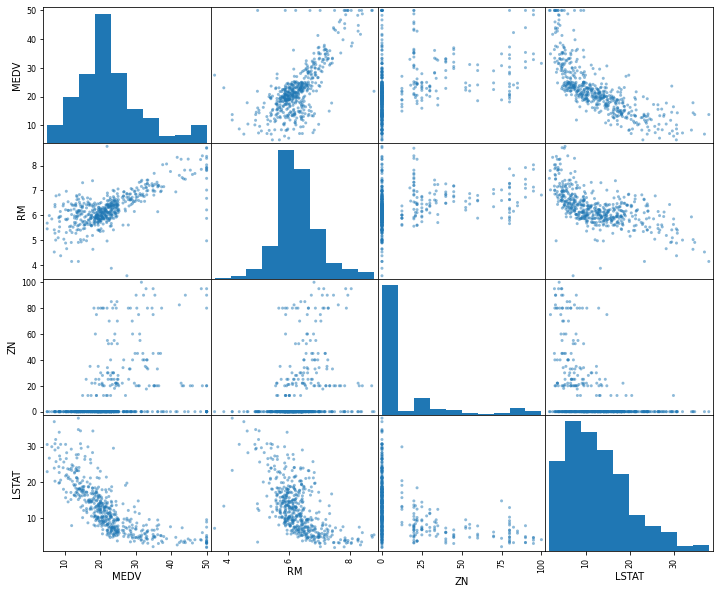

In [18]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize = (12,10))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

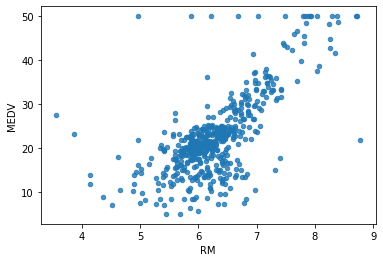

In [19]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)
## as we can see RMs 5,6,7 having MEDV value is 50 we can remove this outlier 

#### Outliers

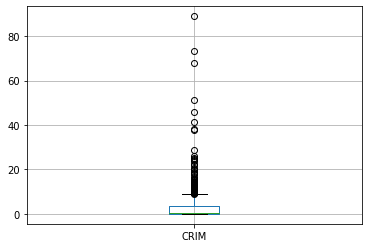

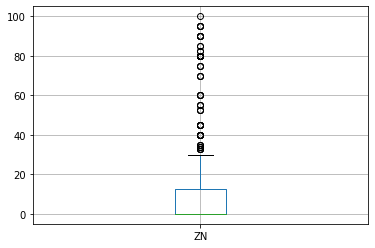

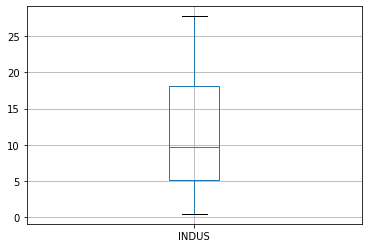

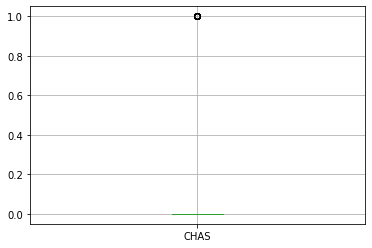

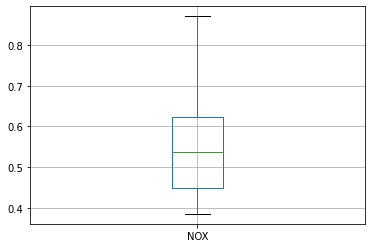

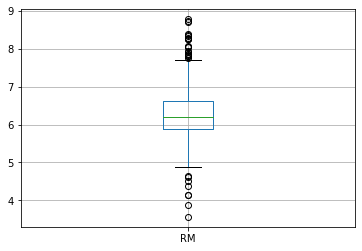

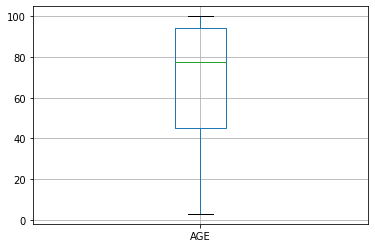

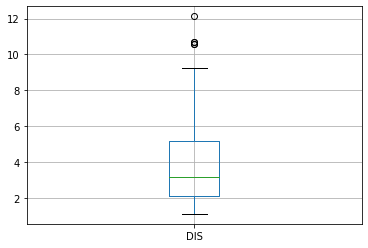

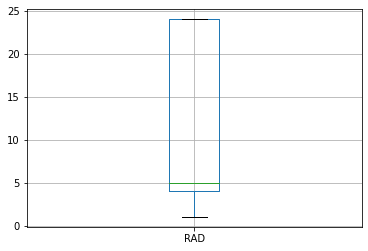

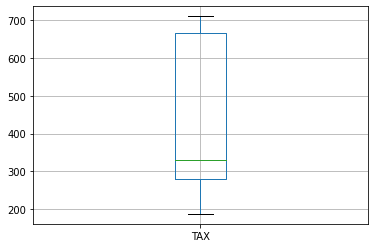

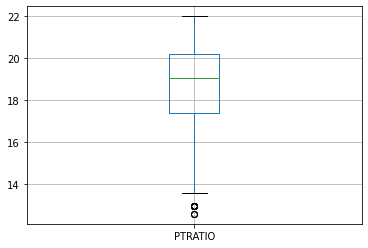

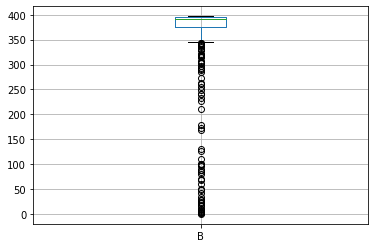

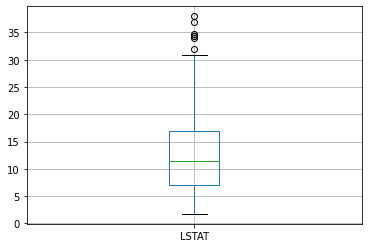

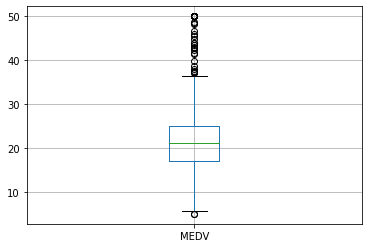

In [20]:
for feature in housing.columns:
    data=housing.copy()
    data.boxplot(column=feature)
    plt.show()

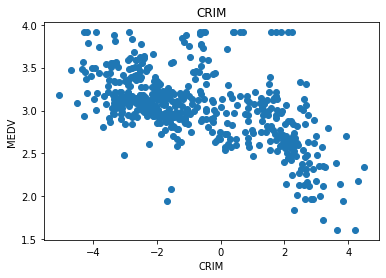

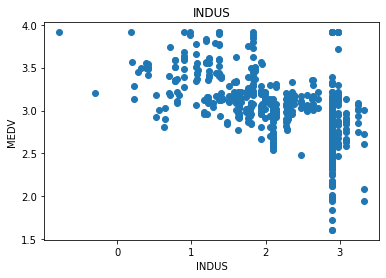

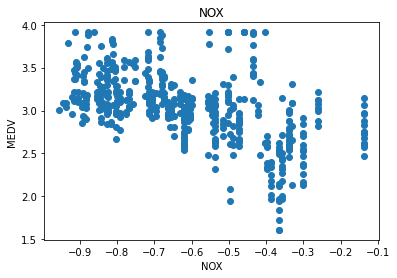

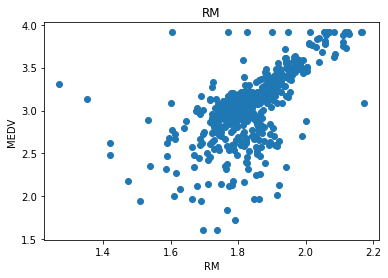

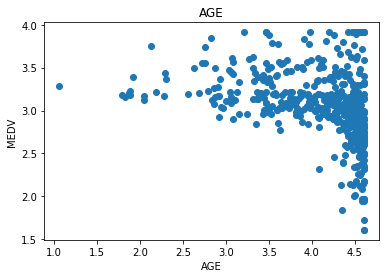

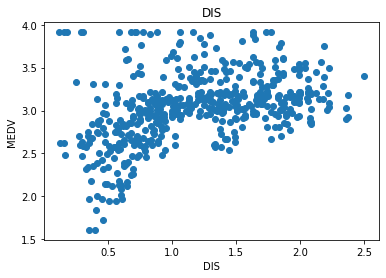

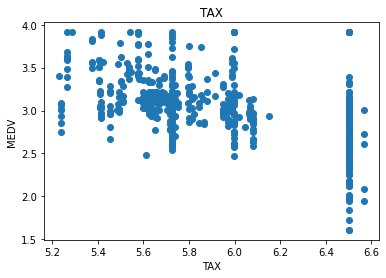

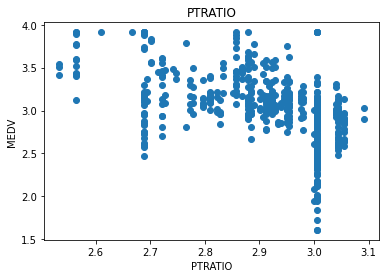

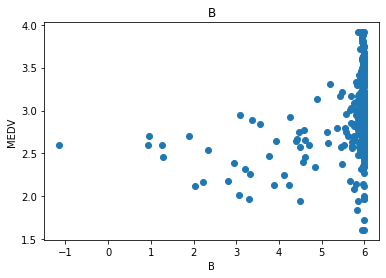

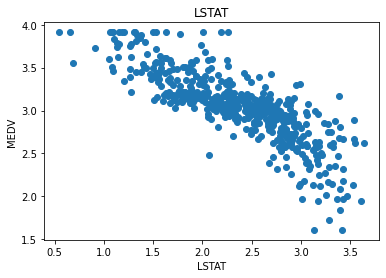

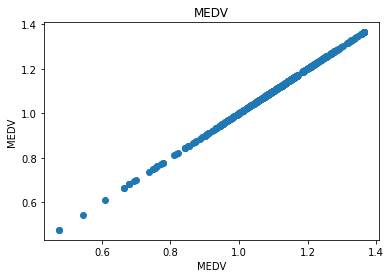

In [21]:
## applying log transformation
import numpy as np
for feature in continuous_feature:
    data=housing.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['MEDV']=np.log(data['MEDV'])
        plt.scatter(data[feature],data['MEDV'])
        plt.xlabel(feature)
        plt.ylabel('MEDV')
        plt.title(feature)
        plt.show()

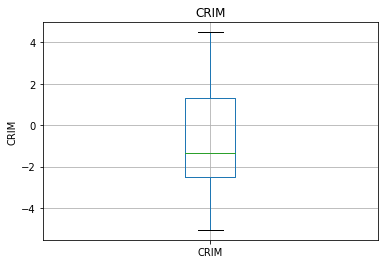

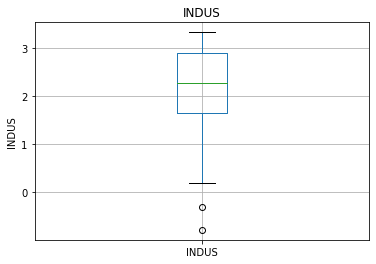

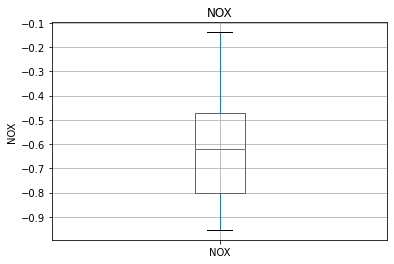

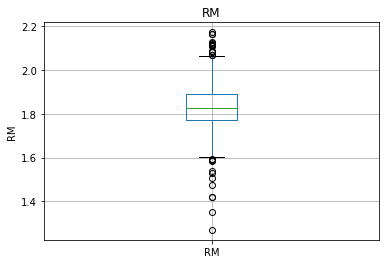

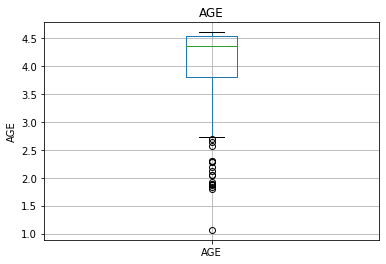

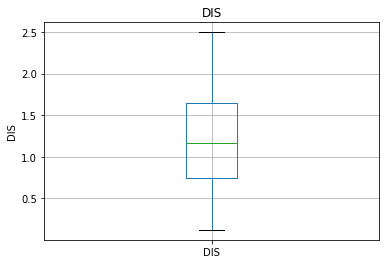

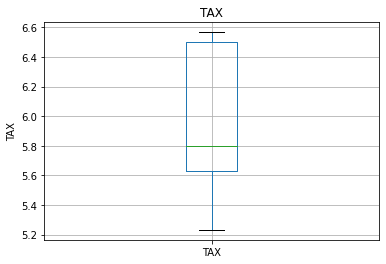

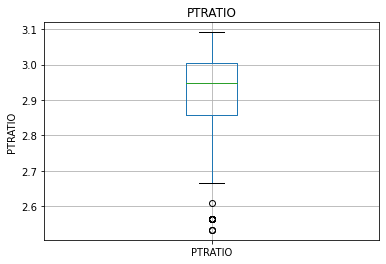

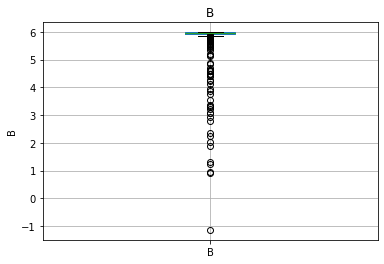

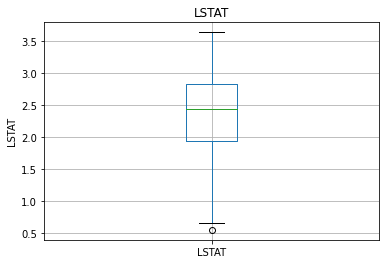

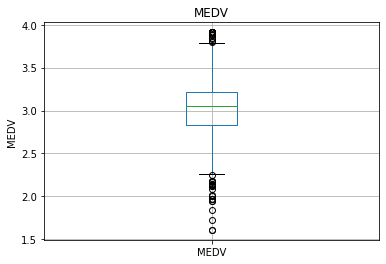

In [22]:
#after applying log transgormation we can see the boxplot in some of the features outliers are removed

for feature in continuous_feature:
    data=housing.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()


In [23]:
mins,maxs=housing.MEDV.quantile([0.001,0.999])
mins,maxs
housing=housing[(housing.MEDV < maxs) & (housing.MEDV > mins)]

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

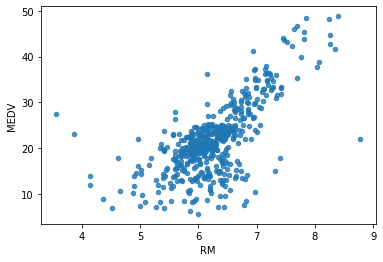

In [24]:
## after removing the outlier
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

In [25]:
housing.shape

(488, 14)

In [26]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2



#### While doing feature engineering first we want to do train test split to avoid data lekage

In [27]:
X=housing.iloc[:,:-1]
y=housing.iloc[:,-1]

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
433,5.58107,0.0,18.10,0,0.713,6.436,87.9,2.3158,24,666,20.2,100.19,16.22
325,0.19186,0.0,7.38,0,0.493,6.431,14.7,5.4159,5,287,19.6,393.68,5.08
25,0.84054,0.0,8.14,0,0.538,5.599,85.7,4.4546,4,307,21.0,303.42,16.51
230,0.53700,0.0,6.20,0,0.504,5.981,68.1,3.6715,8,307,17.4,378.35,11.65
309,0.34940,0.0,9.90,0,0.544,5.972,76.7,3.1025,4,304,18.4,396.24,9.97


In [30]:
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52
252,0.08221,22.0,5.86,0,0.431,6.957,6.8,8.9067,7,330,19.1,386.09,3.53
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13
79,0.08387,0.0,12.83,0,0.437,5.874,36.6,4.5026,5,398,18.7,396.06,9.10
420,11.08740,0.0,18.10,0,0.718,6.411,100.0,1.8589,24,666,20.2,318.75,15.02


In [31]:
X_train.shape, X_test.shape

((390, 13), (98, 13))

In [32]:
X_train=X_train.copy()

In [33]:
## most of the data is skewed so for that we apply log transformation
import numpy as np
num_features=['CRIM','NOX','DIS','TAX','LSTAT','B','RM','PTRATIO','INDUS']
for feature in num_features:
    X_train[feature]=np.log(X_train[feature])

In [34]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
433,1.719381,0.0,2.895912,0,-0.338274,1.861907,87.9,0.839755,24,6.501290,3.005683,4.607068,2.786245
325,-1.650989,0.0,1.998774,0,-0.707246,1.861130,14.7,1.689339,5,5.659482,2.975530,5.975538,1.625311
25,-0.173711,0.0,2.096790,0,-0.619897,1.722588,85.7,1.493937,4,5.726848,3.044522,5.715118,2.803966
230,-0.621757,0.0,1.824549,0,-0.685179,1.788588,68.1,1.300600,8,5.726848,2.856470,5.935820,2.455306
309,-1.051538,0.0,2.292535,0,-0.608806,1.787082,76.7,1.132208,4,5.717028,2.912351,5.982020,2.299581


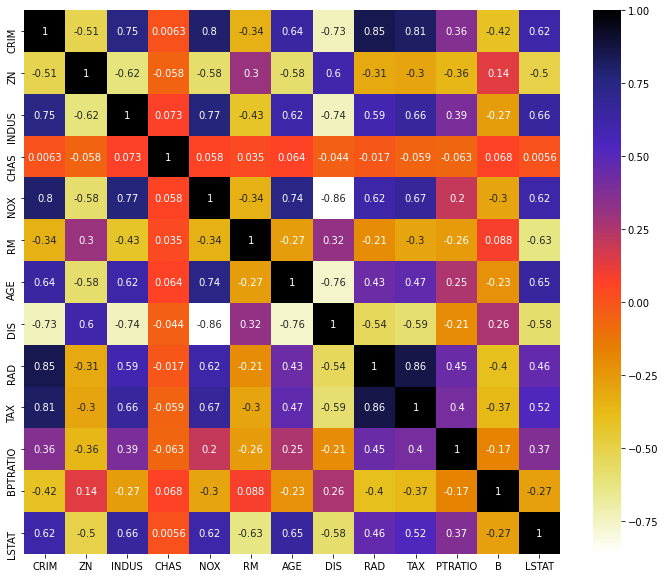

In [35]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [36]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [37]:
corr_features = correlation(X_train, 0.85)
print(len(set(corr_features)))
corr_features

2


{'RAD', 'TAX'}

In [38]:
X_train.drop('RAD',axis=1,inplace=True) #drop feature RAD

In [39]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
433,1.719381,0.0,2.895912,0,-0.338274,1.861907,87.9,0.839755,6.501290,3.005683,4.607068,2.786245
325,-1.650989,0.0,1.998774,0,-0.707246,1.861130,14.7,1.689339,5.659482,2.975530,5.975538,1.625311
25,-0.173711,0.0,2.096790,0,-0.619897,1.722588,85.7,1.493937,5.726848,3.044522,5.715118,2.803966
230,-0.621757,0.0,1.824549,0,-0.685179,1.788588,68.1,1.300600,5.726848,2.856470,5.935820,2.455306
309,-1.051538,0.0,2.292535,0,-0.608806,1.787082,76.7,1.132208,5.717028,2.912351,5.982020,2.299581


#### Feature Scaling

In [40]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [41]:
X_train_SC=scaler.fit_transform(X_train)

In [42]:
X_train_SC

array([[ 1.18323338, -0.50147545,  0.98452389, ...,  0.78661131,
        -1.59335381,  0.67385345],
       [-0.40309493, -0.50147545, -0.20090109, ...,  0.53715881,
         0.29875763, -1.34456612],
       [ 0.29221418, -0.50147545, -0.07138789, ...,  1.10792863,
        -0.06131196,  0.70466385],
       ...,
       [ 1.05624508, -0.50147545,  0.98452389, ...,  0.78661131,
         0.28839328,  0.24440097],
       [ 1.3670772 , -0.50147545,  0.98452389, ...,  0.78661131,
         0.23474789,  0.72871729],
       [-0.32030075, -0.50147545, -0.00491124, ...,  1.06843986,
        -2.07342194, -0.06082512]])

In [43]:
X_train=pd.DataFrame(X_train_SC,columns=X_train.columns)

In [44]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,1.183233,-0.501475,0.984524,-0.261712,1.388681,0.330366,0.682163,-0.674793,1.460502,0.786611,-1.593354,0.673853
1,-0.403095,-0.501475,-0.200901,-0.261712,-0.462756,0.323297,-1.929220,0.894465,-0.677589,0.537159,0.298758,-1.344566
2,0.292214,-0.501475,-0.071388,-0.261712,-0.024452,-0.936728,0.603679,0.533540,-0.506489,1.107929,-0.061312,0.704664
3,0.081333,-0.501475,-0.431111,-0.261712,-0.352027,-0.336467,-0.024195,0.176430,-0.506489,-0.447805,0.243841,0.098477
4,-0.120952,-0.501475,0.187257,-0.261712,0.031199,-0.350163,0.282607,-0.134606,-0.531430,0.014487,0.307720,-0.172270


#### Feature Selection

In [45]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=42)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=42))

In [46]:
selected_feat = X_train.columns[(feature_sel_model.get_support())]
selected_feat

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

##### Makining changes in test data applying log and standard scaler

In [47]:
#### Testing on the test data
#### applying log on test data
X_test=X_test.copy()
import numpy as np
num_features=['CRIM','NOX','DIS','TAX','LSTAT','B','RM','PTRATIO','INDUS']
for feature in num_features:
    X_test[feature]=np.log(X_test[feature])

X_test.drop('RAD',axis=1,inplace=True) #drop feature RAD

#### applying SC on test data
X_test_SC=scaler.transform(X_test)
X_test=pd.DataFrame(X_test_SC,columns=X_test.columns)

In [48]:
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,-0.750871,-0.501475,0.303452,-0.261712,-1.351219,-0.209623,-2.175375,0.850077,-0.523089,0.366578,0.288995,-1.200145
1,-0.801982,0.464980,-0.505634,-0.261712,-1.137157,1.038322,-2.211050,1.813327,-0.322995,0.323377,0.271840,-1.977446
2,1.107579,-0.501475,0.984524,-0.261712,1.388681,0.455272,0.632218,-0.581478,1.460502,0.786611,-2.529147,0.867402
3,-0.792572,-0.501475,0.529817,-0.261712,-1.067785,-0.500648,-1.147946,0.553337,0.152875,0.148283,0.307091,-0.331016
4,1.506314,-0.501475,0.984524,-0.261712,1.423746,0.294968,1.113826,-1.080728,1.460502,0.786611,0.006838,0.540219


In [49]:
X_test.shape

(98, 12)

#### Selecting a desired model

##### Using Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

##### Using Metrics

In [51]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
predictions1=model.predict(X_train)
r2=r2_score(y_train,predictions1)
mse=mean_squared_error(y_train,predictions1)
mae=mean_absolute_error(y_train,predictions1)
rmse=np.sqrt(mse)
print(f"R Squared = {r2} \nMean Squared Error = {mse} \nMean Absolute Error = {mae} \nRoot Mean Squared Error = {rmse}")

R Squared = 0.776695687945633 
Mean Squared Error = 12.762564992731216 
Mean Absolute Error = 2.6976362478379086 
Root Mean Squared Error = 3.572473231912482


##### Using Lasso Regression

In [52]:
from sklearn.linear_model import Lasso
modellasso=Lasso()
modellasso.fit(X_train,y_train)

Lasso()

##### Using Metrics

In [53]:
predictions2=modellasso.predict(X_train)
r2=r2_score(y_train,predictions2)
mse=mean_squared_error(y_train,predictions2)
mae=mean_absolute_error(y_train,predictions2)
rmse=np.sqrt(mse)
print(f"R Squared = {r2} \nMean Squared Error = {mse} \nMean Absolute Error = {mae} \nRoot Mean Squared Error = {rmse}")

R Squared = 0.7077344200055861 
Mean Squared Error = 16.70392490633522 
Mean Absolute Error = 3.0924170350420086 
Root Mean Squared Error = 4.087043541037362


##### Using K Nearest Neighbour

In [54]:
from sklearn.neighbors import KNeighborsRegressor
modelKNN=KNeighborsRegressor(5)
modelKNN.fit(X_train,y_train)

KNeighborsRegressor()

##### Using Metrics

In [55]:
predictions3=modelKNN.predict(X_train)
r2=r2_score(y_train,predictions3)
mse=mean_squared_error(y_train,predictions3)
mae=mean_absolute_error(y_train,predictions3)
rmse=np.sqrt(mse)
print(f"R Squared = {r2} \nMean Squared Error = {mse} \nMean Absolute Error = {mae} \nRoot Mean Squared Error = {rmse}")

R Squared = 0.8540863849031108 
Mean Squared Error = 8.339435897435898 
Mean Absolute Error = 1.9814358974358974 
Root Mean Squared Error = 2.8878081476157482


##### Using Decison Tree Regressor

In [56]:
from sklearn.tree import DecisionTreeRegressor
modelDT=DecisionTreeRegressor()
modelDT.fit(X_train,y_train)

DecisionTreeRegressor()

In [57]:
predictions4=modelDT.predict(X_train)
r2=r2_score(y_train,predictions4)
mse=mean_squared_error(y_train,predictions4)
mae=mean_absolute_error(y_train,predictions4)
rmse=np.sqrt(mse)
print(f"R Squared = {r2} \nMean Squared Error = {mse} \nMean Absolute Error = {mae} \nRoot Mean Squared Error = {rmse}")

R Squared = 1.0 
Mean Squared Error = 0.0 
Mean Absolute Error = 0.0 
Root Mean Squared Error = 0.0


#### Overfitting occurs we will do cross validation

In [58]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelDT, X_train,y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print(rmse_scores.mean())

3.8456461216206703


##### Using Random Forest Regressor

In [59]:
from sklearn.ensemble import RandomForestRegressor
modelRF=RandomForestRegressor()
modelRF.fit(X_train,y_train)

RandomForestRegressor()

##### Using Metrics

In [60]:
predictions5=modelRF.predict(X_train)
r2=r2_score(y_train,predictions5)
mse=mean_squared_error(y_train,predictions5)
mae=mean_absolute_error(y_train,predictions5)
rmse=np.sqrt(mse)
print(f"R Squared = {r2} \nMean Squared Error = {mse} \nMean Absolute Error = {mae} \nRoot Mean Squared Error = {rmse}")

R Squared = 0.9795075946382673 
Mean Squared Error = 1.171207366666666 
Mean Absolute Error = 0.7536333333333319 
Root Mean Squared Error = 1.0822233441700775


##### Testing on Test data

In [61]:
#KNN model on test data
predictionsKNN=modelKNN.predict(X_test)
r2=r2_score(y_test,predictionsKNN)
mse=mean_squared_error(y_test,predictionsKNN)
mae=mean_absolute_error(y_test,predictionsKNN)
rmse=np.sqrt(mse)
print(f"R Squared = {r2} \nMean Squared Error = {mse} \nMean Absolute Error = {mae} \nRoot Mean Squared Error = {rmse}")

R Squared = 0.819333493450707 
Mean Squared Error = 13.600208163265304 
Mean Absolute Error = 2.5577551020408165 
Root Mean Squared Error = 3.6878460059044365


In [62]:
#Decison tree on test data
predictionsDT=modelDT.predict(X_test)
r2=r2_score(y_test,predictionsDT)
mse=mean_squared_error(y_test,predictionsDT)
mae=mean_absolute_error(y_test,predictionsDT)
rmse=np.sqrt(mse)
print(f"R Squared = {r2} \nMean Squared Error = {mse} \nMean Absolute Error = {mae} \nRoot Mean Squared Error = {rmse}")

R Squared = 0.842376036703284 
Mean Squared Error = 11.865612244897958 
Mean Absolute Error = 2.5908163265306126 
Root Mean Squared Error = 3.4446498000374377


In [63]:
#Random Forest tree on test data
predictionsRF=modelRF.predict(X_test)
r2=r2_score(y_test,predictionsRF)
mse=mean_squared_error(y_test,predictionsRF)
mae=mean_absolute_error(y_test,predictionsRF)
rmse=np.sqrt(mse)
print(f"R Squared = {r2} \nMean Squared Error = {mse} \nMean Absolute Error = {mae} \nRoot Mean Squared Error = {rmse}")

R Squared = 0.8967389083779507 
Mean Squared Error = 7.773285530612249 
Mean Absolute Error = 2.115857142857142 
Root Mean Squared Error = 2.788061249437008


#### Random Forest Regressor is showing high accuracy and less RMSE both on test and train data.

##### Hyperparameter Tuning

### Using RandomizedSearchCV

In [64]:
# ####Hyperparameters
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt','log2']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 7, 8, 9, 10, 11, 13]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4, 6, 8]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth':max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#               }
# print(random_grid)

In [65]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import RandomForestRegressor
# es=RandomForestRegressor()
# model=RandomizedSearchCV(estimator=es,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=10,verbose=2,n_jobs=1,random_state=42)

In [66]:
# model.fit(X_train,y_train)

In [67]:
# model.best_params_

In [68]:
# p=model.predict(X_test)
# r2=r2_score(y_test,p)
# mse=mean_squared_error(y_test,p)
# mae=mean_absolute_error(y_test,p)
# rmse=np.sqrt(mse)
# print(f"R Squared = {r2} \nMean Squared Error = {mse} \nMean Absolute Error = {mae} \nRoot Mean Squared Error = {rmse}")

### Using GridSearchCV

In [69]:
# from sklearn.model_selection import GridSearchCV
# # Number of trees in random forest
# n_estimators = [900,1000,1100]
# # Number of features to consider at every split
# max_features = ['sqrt']
# # Maximum number of levels in tree
# max_depth = [900,1000,1100]
# # Minimum number of samples required to split a node
# min_samples_split = [2,3,5]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1,2,3]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth':max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#               }
# print(random_grid)

In [70]:
# model1=GridSearchCV(estimator=es,param_grid=random_grid,scoring='neg_mean_squared_error',cv=10,verbose=2,n_jobs=1)

In [71]:
# model1.fit(X_train,y_train)

In [72]:
# model1.best_params_

In [73]:
### using best parameters
model1=RandomForestRegressor(n_estimators=1100,max_depth=900,max_features='sqrt',min_samples_leaf=1,min_samples_split=2)
model1.fit(X_train,y_train)

RandomForestRegressor(max_depth=900, max_features='sqrt', n_estimators=1100)

##### Using Metrics

In [74]:
#after hypertuning Random Forest tree on train data
predictionsRF1=model1.predict(X_train)
r2=r2_score(y_train,predictionsRF1)
mse=mean_squared_error(y_train,predictionsRF1)
mae=mean_absolute_error(y_train,predictionsRF1)
rmse=np.sqrt(mse)
print(f"R Squared = {r2} \nMean Squared Error = {mse} \nMean Absolute Error = {mae} \nRoot Mean Squared Error = {rmse}")

R Squared = 0.9816322180126625 
Mean Squared Error = 1.0497782565373783 
Mean Absolute Error = 0.7288708624708485 
Root Mean Squared Error = 1.0245868711521626


In [75]:
#after hypertuning Random Forest tree on test data
predictionsRF2=model1.predict(X_test)
r2=r2_score(y_test,predictionsRF2)
mse=mean_squared_error(y_test,predictionsRF2)
mae=mean_absolute_error(y_test,predictionsRF2)
rmse=np.sqrt(mse)
print(f"R Squared = {r2} \nMean Squared Error = {mse} \nMean Absolute Error = {mae} \nRoot Mean Squared Error = {rmse}")

R Squared = 0.8955331069503834 
Mean Squared Error = 7.864055816326519 
Mean Absolute Error = 2.0625157699443344 
Root Mean Squared Error = 2.8042923913755


g:\pratik\final year project\machine learning\projects\house price prediction\house\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

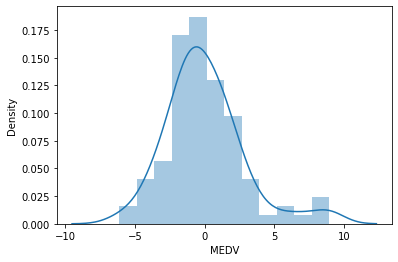

In [76]:
sns.distplot(y_test-predictionsRF2)

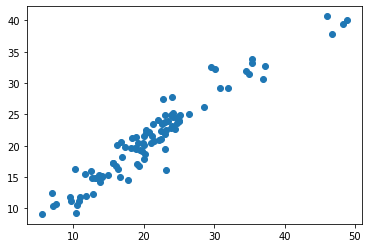

In [82]:
plt.scatter(y_test,predictionsRF2)

<AxesSubplot:xlabel='MEDV'>

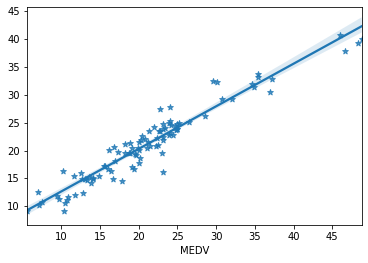

In [83]:
sns.regplot(x=y_test,y=predictionsRF2,scatter=True,marker='*')

In [78]:
import pickle
file=open('RFHouseModel.pkl','wb')
pickle.dump(model1,file)

In [79]:
pickle.dump(scaler,open('Scaler.pkl','wb'))